In [1]:
import numpy as np
import matplotlib.pyplot as plt

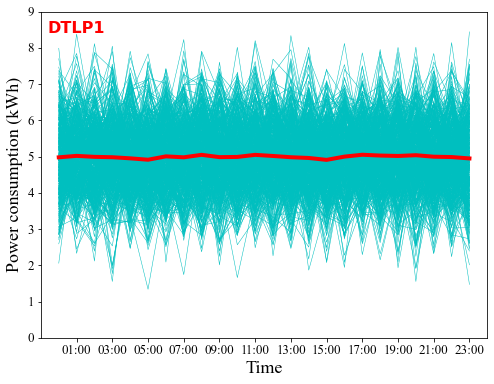

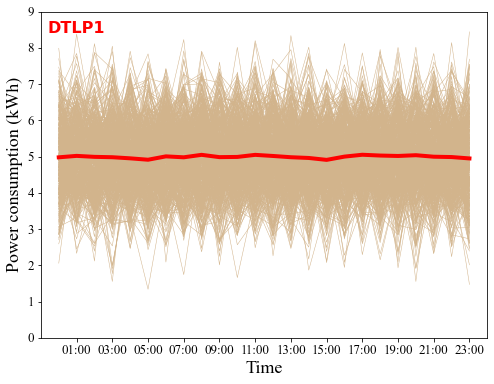

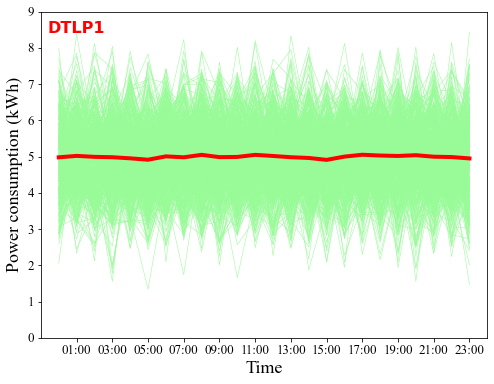

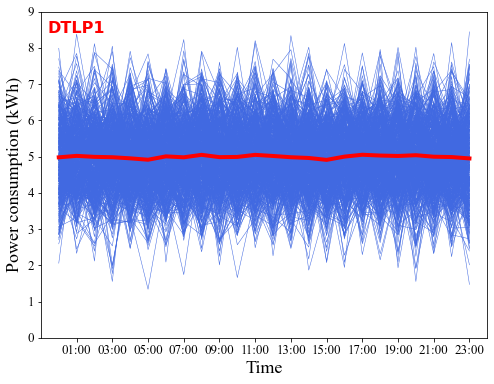

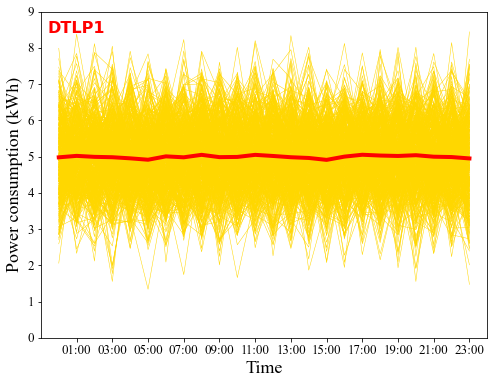

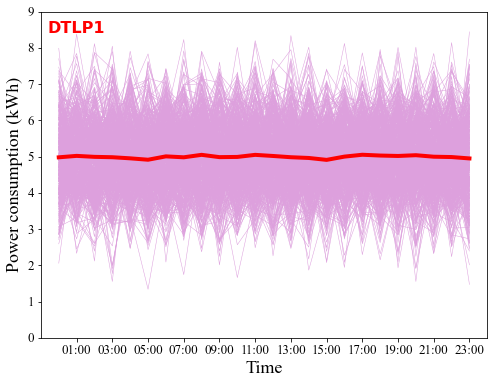

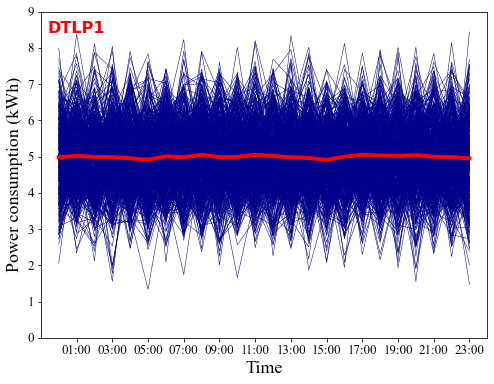

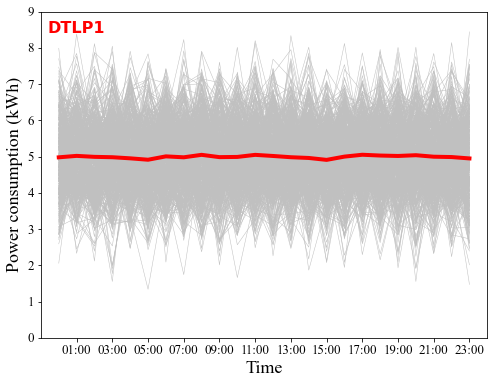

In [7]:
def draw_DLPs(x, DLPs, ymax=None, pure=False, cluster_center=None, lt_title=None,
              title=None, filepath=None, formats=None, color='#C8C8FF', c_color='#8B0000'):
    r'''
    x: 曲线维度，为24,48,96等
    DLPs: DLP数组或ndarray
    cluster_center: 聚类中心曲线，对于KMeans聚类来说好像就是平均的
    pure: 为False画彩色的
    默认会画一条平均值曲线
    '''
    # with plt.style.context('science'):
    plt.rcParams['font.family'] = ['Times New Roman']
    label_font = {
        # 'weight': 'bold',
        'size': 18,
        'family': 'Times New Roman'
    }
    if ymax == None:
        ymax = int(DLPs.max()) + 1
    fig = plt.figure(figsize=(8, 6))
    DLPs = np.array(DLPs)
    x = np.array(x)
    assert len(x) == DLPs.shape[1]

    for DLP in DLPs:
        if pure:
            plt.plot(x, DLP, color=color, linewidth=0.5)
        else:
            plt.plot(x, DLP, linewidth=0.5)
    ax = fig.gca()
    if pure:
        if np.any(cluster_center) != None:
            plt.plot(x, cluster_center, color=c_color,
                     linewidth=4, label='Cluster Center')
        else:
            # 用平均值代替聚类中心
            plt.plot(x, DLPs.mean(axis=0), color=c_color,
                     linewidth=4, label='Cluster Center')

    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    plt.xlim((-1, len(x)))
    plt.ylim((0, ymax))
    plt.xlabel('Time', fontdict=label_font)
    plt.ylabel('Power consumption (kWh)', fontdict=label_font)
    plt.tick_params(axis='x')
    plt.tick_params(axis='y')
    ynew_ticks = np.linspace(0, ymax, 10)
    # plt.xticks(np.arange(0, len(x), len(x)/12),
    #            ['00:00',  '02:00', '04:00',  '06:00',
    #             '08:00', '10:00', '12:00', '14:00',
    #             '16:00',  '18:00',  '20:00', '22:00'])
    plt.xticks(np.arange(len(x)/24, len(x) + len(x)/24, len(x)/12),
               ['01:00',  '03:00', '05:00',  '07:00',
                '09:00', '11:00', '13:00', '15:00',
                '17:00',  '19:00',  '21:00', '23:00'], fontsize=13)
    plt.yticks(ynew_ticks, fontsize=13)
    if title is not None:
        plt.title(title, fontdict=label_font)
    if lt_title is not None:
        plt.text(0.11, 0.93, lt_title, fontdict=dict(fontsize=20,
                                                     color='r', family='DejaVu Sans',
                                                     weight='bold'),
                 ha='center', va='center', transform=ax.transAxes)
    if filepath is not None and formats is not None:
        for format in formats:
            plt.savefig(filepath+'.'+format, format=format)
    plt.show()


LEN = 24
x = np.arange(0, LEN)
y = np.random.normal(size=(500, LEN)) + 5
color_list = [('c', 'r'), ('tan', 'r'), ('palegreen', 'r'), ('royalblue', 'r'),
                ('gold', 'r'), ('plum', 'r'), ('darkblue', 'r'), ('silver', 'r')]
for i, colors in enumerate(color_list):
    draw_DLPs(x, y, pure=True,
                color=colors[0], c_color=colors[1], lt_title="DTLP1")
# draw_DLPs(x, y, pure=True, cluster_center=np.random.rand(LEN)+5, title='one color')
